Question 13 (Numerical optimization). Fit the model $Petal.Length≈\alpha-\beta(Sepal.Length)^\gamma,\gamma >0$ by minimizing the mean square error

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

In [2]:
iris = datasets.load_iris()
data = iris.data
# columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [3]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

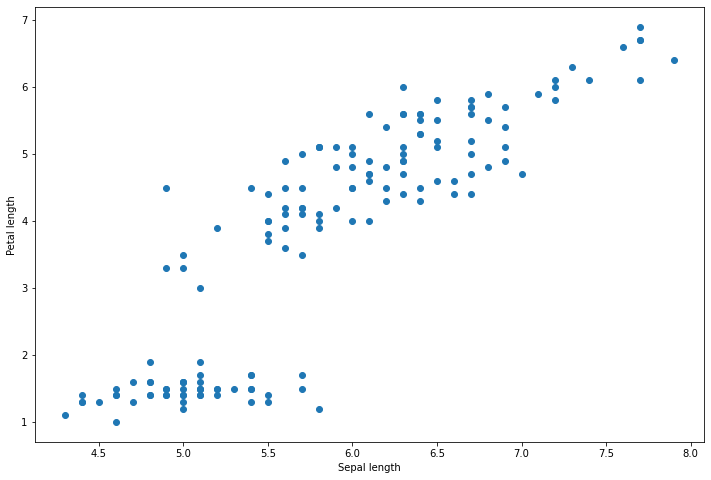

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(data[:, 0], data[:, 2])
plt.xlabel('Sepal length')
plt.ylabel('Petal length');

In [5]:
xdata, ydata = data[:, 0], data[:, 2]

def f(x, α, β, γ):
    return α - β * (x)**γ

def g(params):
    return ydata - f(xdata, *params)

In [6]:
params0 = np.array([1,1,0.1])
fit = scipy.optimize.least_squares(g, params0, bounds=([-np.inf, -np.inf, 0], np.inf)) #, loss = 'soft_l1'

In [7]:
y = f(data[:, 0], *fit.x)
y.shape, xdata.shape
order = xdata.argsort()
x_ord = xdata[order]
y_ord = y[order]

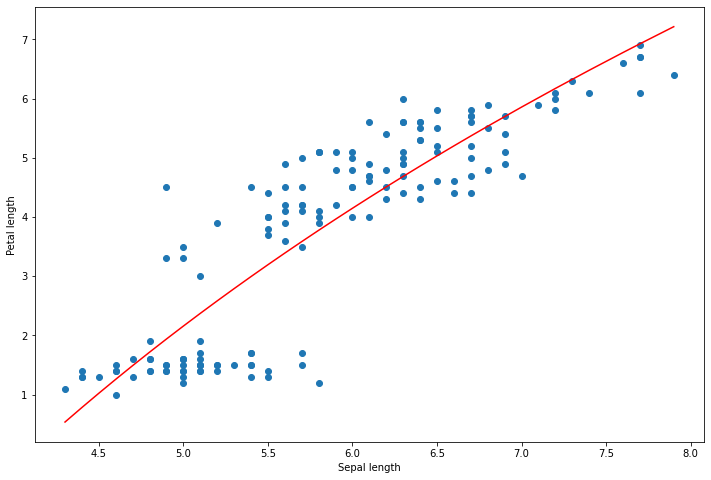

In [8]:
plt.figure(figsize = (12,8))
plt.plot(data[:, 0], data[:, 2], 'o')
plt.plot(x_ord, y_ord, '-r')
plt.xlabel('Sepal length')
plt.ylabel('Petal length');

In [9]:
fit.x

array([-1.14785416e+02, -1.00755893e+02,  9.25664443e-02])